<a href="https://colab.research.google.com/github/patni11/ml_showdown/blob/main/Showdown_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier #Random forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent
from sklearn.neural_network import MLPClassifier #Multi-Layer perceptron
import keras
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.datasets import mnist
from keras.applications import MobileNet

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks


/content/drive/My Drive/Colab Notebooks


In [ ]:
#loading the numpy files
airplane = np.load('full-numpy_bitmap-airplane.npy')
apple = np.load('full-numpy_bitmap-apple.npy')
banana = np.load('full-numpy_bitmap-banana.npy')
birthday_cake = np.load('full-numpy_bitmap-birthday cake.npy')
lipstick = np.load('full-numpy_bitmap-lipstick.npy')

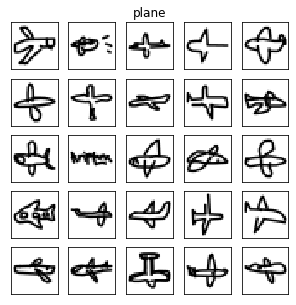

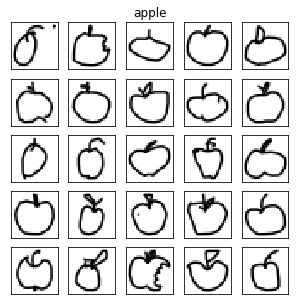

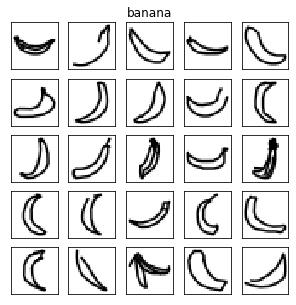

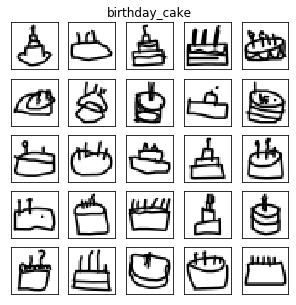

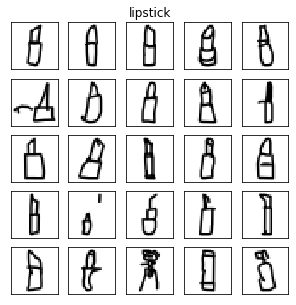

In [ ]:
def plot_samples(input,rows=5,cols=5,title='Drawings'):
  fig,axes = plt.subplots(figsize=[cols,rows])
  axes.axis('off')
  plt.title(title)
  for i in range(0,rows*cols):
    add = fig.add_subplot(rows,cols,i+1)
    imgplot = plt.imshow(input[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

plot_samples(airplane, title='plane')
plot_samples(apple, title='apple')  
plot_samples(banana, title='banana')  
plot_samples(birthday_cake, title='birthday_cake')  
plot_samples(lipstick, title='lipstick')    


In [ ]:
airplane = np.c_[airplane,np.zeros(len(airplane))]
apple = np.c_[apple,np.ones(len(apple))]
banana = np.c_[banana, 2*np.ones(len(banana))]
birthday_cake = np.c_[birthday_cake, 3*np.ones(len(birthday_cake))]
lipstick = np.c_[lipstick, 4*np.ones(len(lipstick))]

In [ ]:
outputs = {0:'airplane',1:'apple',2:'banana',3:'birthday_cake',4:'lipstick'}

In [ ]:
print(airplane.shape)
print(apple.shape)
print(banana.shape)
print(birthday_cake.shape)
print(lipstick.shape)

(151623, 785)
(144722, 785)
(307936, 785)
(144982, 785)
(127623, 785)


In [ ]:
#Creating dependant variable
X = np.concatenate((airplane[:10000,:-1],apple[:10000,:-1],banana[:10000,:-1],birthday_cake[:10000,:-1],lipstick[:10000,:-1] ),axis=0).astype('float32')
print(X.shape)

(50000, 784)


In [ ]:
#Creating independant variable
Y = np.concatenate((airplane[:10000,-1],apple[:10000,-1],banana[:10000,-1],birthday_cake[:10000,-1],lipstick[:10000,-1] ),axis=0).astype('float32')
print(Y.shape)

(50000,)


In [ ]:
print(Y)

[0. 0. 0. ... 4. 4. 4.]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [ ]:
#Random Forest
%%time
parameters = {'n_estimators': [10,20,40,60,80,100,120,140,160]}

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
rf.fit(X_train, Y_train)

results = pd.DataFrame(rf.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
exception calling callback for <Future at 0x7f36ff2badd8 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 754, 

TerminatedWorkerError: ignored

In [ ]:
%%time
clf_rf = RandomForestClassifier(n_estimators=80, n_jobs=-1, random_state=0, max_depth = 8, max_features = 'auto', criterion = 'entropy')
clf_rf.fit(X_train, Y_train)


In [ ]:
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf)
print ('random forest accuracy: ',acc_rf)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_rf)
print('confusion matrix: ', cm)

In [ ]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
print(np.mean(recall))

In [ ]:
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(np.mean(precision))

In [ ]:
results.sort_values('mean_test_score', ascending = False)

In [ ]:
results.plot('param_n_estimators','mean_test_score');


In [ ]:
print(rf.best_params_)

In [ ]:
#KNN
%%time 

tuning_parameters = {'n_neighbors': [2,5,8]}

clf_knn = KNeighborsClassifier(n_jobs=-1)
knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn.fit(X_train, Y_train)

results_knn = pd.DataFrame(knn.cv_results_)
results_knn.sort_values('mean_test_score', ascending = False)

In [ ]:
results_knn.sort_values('mean_test_score', ascending = False)

In [ ]:
results_knn.plot('param_n_neighbors','mean_test_score');

In [ ]:
%%time 

best_clf_knn = KNeighborsClassifier(n_neighbors = 5 ,n_jobs=-1)
best_clf_knn.fit(X_train, Y_train)


In [ ]:
y_pred_knn = best_clf_knn.predict(X_test)
acc_knn = accuracy_score(Y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

In [ ]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)
print('confusion matrix:')
print(cm_knn)

In [ ]:
#MLP
%%time
tuning_parameaters = {'hidden_layer_sizes' : [(50,50), (100,100), (784,784), (50,50,50), (100,100,100)], 
                     'alpha' : list(10.0 ** -np.arange(2, 5))}

clf_mlp = MLPClassifier(random_state=0)
mlp = GridSearchCV(clf_mlp, param_grid=tuning . _parameaters, n_jobs=-1)
mlp.fit(X_train, Y_train)
results=pd.DataFrame(mlp.cv_results_)
results.sort_values('mean_test_score', ascending = False)

In [ ]:
results=pd.DataFrame(mlp.cv_results_)
results.sort_values('mean_test_score', ascending = False)

In [ ]:
results.plot('param_hidden_layer_sizes','mean_test_score',figsize=(10,10));

In [ ]:
results.plot('param_alpha','mean_test_score');

In [ ]:
results.plot('params','mean_test_score',figsize=(40,10));

In [ ]:
%%time
best_mlp = MLPClassifier(alpha=0.001,hidden_layer_sizes=(784,784),random_state=0,batch_size=20)
best_mlp.fit(X_train,Y_train)

In [ ]:
y_pred_mlp = best_mlp.predict(X_test)
mlp_acc = accuracy_score(Y_test, y_pred_mlp)
print ('MLP accuracy: ',mlp_acc)

In [ ]:
cm_mlp = confusion_matrix(Y_test, y_pred_mlp)
print('confusion matrix:')
print(cm_mlp)

In [ ]:
print(X_test.shape)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
??keras.utils.to_categorical(y_train, 10)

In [ ]:
print(y_train)

In [ ]:
X_train = X_train.reshape(35000,28,28,1)
X_test = X_test.reshape(15000,28,28,1)


In [ ]:
print(X_test.shape)

In [ ]:
test_X = []

In [ ]:
test_X = test_X.reshape(15000,28,28)

In [ ]:
clear banana

In [ ]:
print(test_X_2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for i in range(test_X.shape[0]):
  img = cv2.resize(test_X[i],(140,140))
  test_X_2.append(img)


In [ ]:
X_test = test_X_2

In [ ]:
Y_train = keras.utils.to_categorical(Y_train, 5)

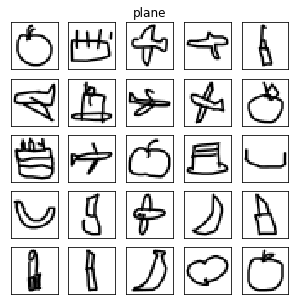

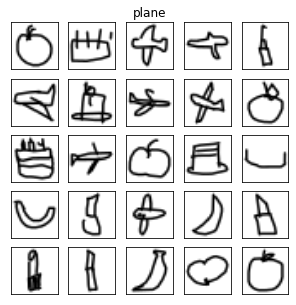

In [ ]:
def plot_samples(input,rows=5,cols=5,title='Drawings'):
  fig,axes = plt.subplots(figsize=[cols,rows])
  axes.axis('off')
  plt.title(title)
  for i in range(0,rows*cols):
    add = fig.add_subplot(rows,cols,i+1)
    imgplot = plt.imshow(input[i], cmap='gray_r', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

plot_samples(test_X, title='plane')
plot_samples(test_X_2, title='plane')
  


In [ ]:
Y_train_for_building = keras.utils.to_categorical(Y_train, 5)
#Y_test = keras.utils.to_categorical(Y_test, 5)


In [ ]:
#CNN
Cnn_model = Sequential()
Cnn_model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape = (28,28,1)))
Cnn_model.add(Conv2D(32,(3,3),activation='relu'))
Cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
Cnn_model.add(Dropout(0.25))
Cnn_model.add(Conv2D(64,(3,3),activation='relu'))
Cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
Cnn_model.add(Dropout(0.25))
Cnn_model.add(Flatten())
Cnn_model.add(Dense(128, activation='relu'))
Cnn_model.add(Dropout(0.5))
Cnn_model.add(Dense(5, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
%%time
Cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
Cnn_model.fit(X_train, Y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))
score = Cnn_model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



In [ ]:
%%time
Cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
Cnn_model.fit(X_train, Y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))
score = Cnn_model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



In [ ]:
print(score[2])

In [ ]:
y_pred_cnn = Cnn_model.predict(X_test)

In [ ]:
cnn_acc = accuracy_score(Y_test, y_pred_cnn)

ValueError: ignored

In [ ]:
cm_cnn = confusion_matrix(Y_test, y_pred_cnn)
print('confusion matrix:')
print(cm_cnn)

ValueError: ignored

In [ ]:
print(y_pred_cnn.shape)

(15000, 5)


In [ ]:
print(Y_test.shape)

(15000, 5)


In [ ]:
y_pred_copy = y_pred_cnn

In [ ]:
y_pred_copy = np.argmax(y_pred_copy)

In [ ]:
print(y_pred_copy)

[[6.5961510e-22 1.0000000e+00 1.0718499e-14 3.4261273e-14 1.5127216e-14]
 [8.4047955e-24 1.0000000e+00 2.1041423e-15 3.2592826e-15 1.3069546e-16]
 [6.3253251e-17 7.1226072e-19 6.3157392e-14 1.2898490e-13 1.0000000e+00]
 ...
 [3.4575274e-32 4.7390862e-28 0.0000000e+00 1.0000000e+00 1.2625817e-29]
 [1.1617234e-18 1.9875901e-17 4.7332979e-16 4.7525673e-12 1.0000000e+00]
 [2.1701969e-16 1.5771726e-10 1.2928064e-18 1.0000000e+00 2.7119784e-12]]


In [ ]:
Y_test_2 = []

In [ ]:
for i in range(Y_test.shape[0]):
  data = Y_test[i]
  decoded_data = decode(data)
  Y_test_2.append(decoded_data)

In [ ]:
def decode(data):
  return np.argmax(data)


In [ ]:
Y_test_2 = np.asarray(Y_test_2)

In [ ]:
print(y_pred_copy_2.shape)

(15000,)


In [ ]:
print(Y_test_2.shape)

(15000,)


In [ ]:
cm_cnn = confusion_matrix(Y_test_2, y_pred_copy_2)
print('confusion matrix:')
print(cm_cnn)

confusion matrix:
[[2917   13   18   29   40]
 [  19 2951   11   20   19]
 [  37   22 2878   12   36]
 [  13   43    3 2920   16]
 [  20   14   20   23 2906]]


In [ ]:
cnn_acc = accuracy_score(Y_test_2, y_pred_copy_2)
print ('CNN accuracy: ',cnn_acc)

CNN accuracy:  0.9714666666666667


In [ ]:
mobile = MobileNet(input_shape = (140,140,1),alpha = 1.,weights=None,classes=5)
mobile.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(mobile.summary())



Model: "mobilenet_1.00_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 140, 140, 1)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 141, 141, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 70, 70, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 70, 70, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 70, 70, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 70, 70, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 70, 70, 32

In [ ]:
#MobileNet
%%time
mobile.fit(X_train, Y_train,32,20,1)

Epoch 1/20
35000/35000 [==============================] - 154s 4ms/step - loss: 0.2665 - acc: 0.9149
Epoch 2/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.1314 - acc: 0.9575
Epoch 3/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.1012 - acc: 0.9677
Epoch 4/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.0806 - acc: 0.9731
Epoch 5/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.0660 - acc: 0.9784
Epoch 6/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.0551 - acc: 0.9812
Epoch 7/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.0463 - acc: 0.9841
Epoch 8/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.0369 - acc: 0.9870
Epoch 9/20
35000/35000 [==============================] - 138s 4ms/step - loss: 0.0303 - acc: 0.9897
Epoch 10/20
35000/35000 [==============================] - 137s 4ms/step - loss: 0.0235 - a

In [ ]:
y_pred_mobile = mobile.predict(X_test)

ValueError: ignored

In [ ]:
%reset_selective 

__main__


RuntimeError: ignored